In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

No rows with missing data were removed.




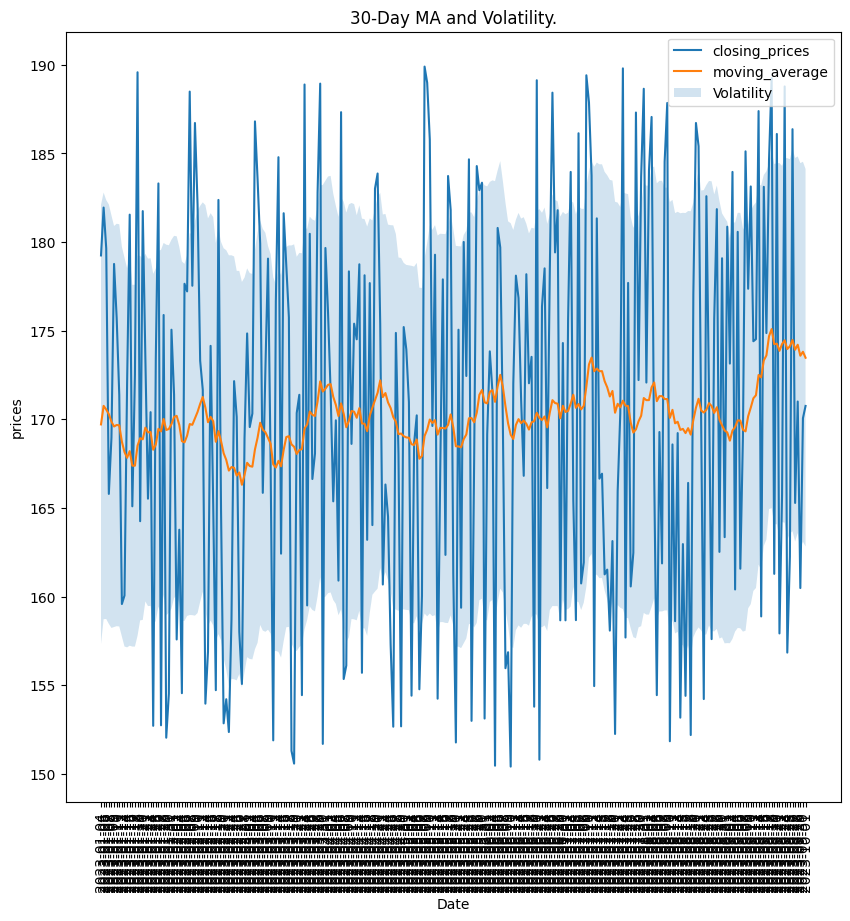

In [8]:
# ---
# Group No. 6
# 1. พิมมาดา แก้วรอด 6410450541
# 2. อภิชญา สุธีระกุล 6410450630
# 3. ภาณุพันธ์ สุวรรณชาติ 6410451806
# 4. ศุภสุตา คะเช็นแก้ว 6410451873
# ---

group = 6 #
problem = 1 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# Read the CSV file into a DataFrame
df = pd.read_csv(data_path)
data = pd.read_csv(data_path)
# Check for missing data
missing_data = df.isnull().sum()

# Remove rows with missing data
df_cleaned = df.dropna()

# Check if any rows were removed
if len(df_cleaned) < len(df):
    print(f"Removed {len(df) - len(df_cleaned)} rows with missing data.")
else:
    print("No rows with missing data were removed.")
# You can now work with the 'df_cleaned' DataFrame, which contains the data without missing values.

# Calculate the 30-day moving average for the 'Close' column
data['30MA'] = df['Close'].rolling(window=30).mean()
print()
# The '30_Day_MA' column now contains the 30-day moving average for 'Close'.

# You may want to drop rows with NaN values, which occur due to the initial 29 days.
data = data.dropna()
# Assuming you have a DataFrame 'df' with a 'Close' column

# Calculate the 30-day volatility for the 'Close' column
data['Volatility'] = df['Close'].rolling(window=30).std()
print()
# The '30_Day_Volatility' column now contains the 30-day volatility for 'Close'.

# You may want to drop rows with NaN values, which occur due to the initial 29 days.
data = data.dropna()

# สร้างข้อมูลตัวอย่าง (ให้แทนที่ด้วยข้อมูลของคุณ)
# ตัวอย่างข้อมูลราคาปิดของหุ้นและเฉลี่ยเคลื่อนที่ในช่วง 30 วัน
Date = pd.date_range(start='2023-01-01', periods=30, freq='D')
# วาดกราฟ
plt.figure(figsize=(10, 10))
plt.plot(data['Date'], data['Close'], label='closing_prices')
plt.plot(data['Date'], data['30MA'], label='moving_average')
plt.fill_between(data['Date'], data['30MA'] - data['Volatility'], data['30MA'] + data['Volatility'], alpha=0.2, label='Volatility')
# เพิ่ม label และ title
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('prices')
plt.title('30-Day MA and Volatility.')
plt.legend()

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()